<a href="https://colab.research.google.com/github/Behnam9473/AI/blob/main/counting_blades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

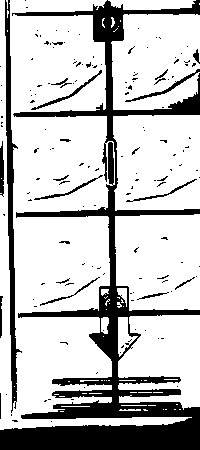

In [38]:
img = cv2.imread("/content/drive/MyDrive/input/vc.png", 0)

# Thresholding the image
img = img[250:700,500:700]
(thresh, img_bin) = cv2.threshold(img, 190, 255,cv2.THRESH_BINARY|     cv2.THRESH_OTSU)
# Invert the image
img_bin = 255-img_bin
cv2_imshow(img_bin)

In [39]:
# Defining a kernel length
kernel_length = np.array(img).shape[1]//80

# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

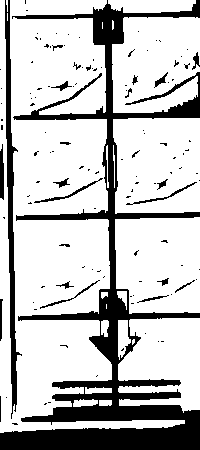

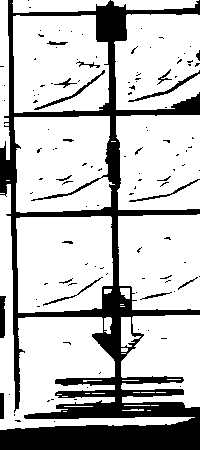

In [41]:
# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)

In [47]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("img_final_bin.jpg",img_final_bin)

True

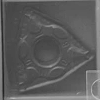

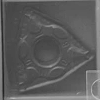

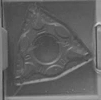

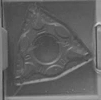

In [69]:
# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
#(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
idx = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if (w > 20 and h > 0) and w > 0.5*h:

        idx += 1
        new_img = img[y:y+h, x:x+w]
        #cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)
        cv2_imshow(new_img)
# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
    if (w > 20 and h > 0) and w > 0.5*h:
        idx += 1
        new_img = img[y:y+h, x:x+w]
        #cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)
        cv2_imshow(new_img)